# Vertical Circular Motion

### $T = \dfrac{mu^2}{r}-2mg+3mg\cos(\theta)$
### $v = \sqrt{u^2-2gr+2gr\cos(\theta)}$


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import warnings

In [142]:
class VCM():
    """
    This is a class for Vertical Circular Motion. Assume all the ordinaries, taut weightless string, no air resistance, etc..
    NOTE: Follow SI system of units.

    Attributes:
        m : The mass in kg.
        r : Radius of string.
        u : Initial / velocity given to bob.
        g : Acceleration due to gravity = 9.8 m/s2 by default.
    
    """
    def __init__(self,m,r,u,g=9.8):
        self.m = m
        self.r = r
        self.u = u
        self.g = g

    def min_init_vel(self):
        return np.sqrt(5*self.r*u.m*self.g*u.m/u.s**2)


    def isLoop(self):
        vmin = self.min_init_vel()
        if self.u >= vmin.value:
            return True
        else:
            return False


    def Tension(self,theta):
        vmin = self.min_init_vel()
        result = ((self.m*u.kg*(self.u*(u.m/u.s))**2)/(self.r*u.m)) - 2*self.m*u.kg*(self.g*(u.m/u.s**2))\
                + 3*self.m*u.kg*(self.g*(u.m/u.s**2))*np.cos(np.deg2rad(theta))
        if self.u >= vmin.value:
            return result
        else:
            warnings.warn('The velocity of object is not enough to finish one complete loop. Tension value cannot be determined')
            return result
            

    def inst_vel(self,theta):
        vmin = self.min_init_vel()
        h = self.r*u.m*(1-np.cos(np.deg2rad(theta)))
        result = np.sqrt(((self.u*(u.m/u.s))**2)-2*(self.g*(u.m/u.s**2))*h)
        if self.u >= vmin.value:
            return result
        else:
            warnings.warn('The velocity of object is not enough to finish one complete loop. Tension value cannot be determined')
            return result


In [143]:
bob = VCM(2,10,24)

In [144]:
bob.isLoop()

True

In [145]:
bob.inst_vel(90)

<Quantity 19.49358869 m / s>

In [146]:
bob.Tension(0)

<Quantity 134.8 kg m / s2>

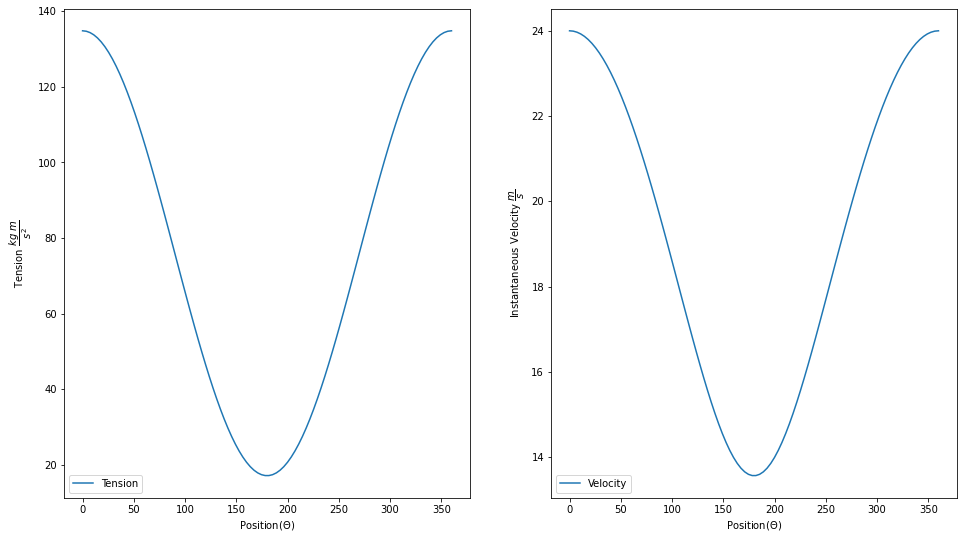

In [147]:
t = np.linspace(0,360,100)

tension = []
vel = []
for i in t:
    tension.append(bob.Tension(i).value)
    vel.append(bob.inst_vel(i).value)

fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].plot(t,tension,label='Tension')
ax[0].set_xlabel('Position($\Theta$)')
ax[0].set_ylabel(r'Tension $\dfrac{kg\;m}{s^2}$')
ax[0].legend()

ax[1].plot(t,vel,label='Velocity')
ax[1].set_xlabel('Position($\Theta$)')
ax[1].set_ylabel(r'Instantaneous Velocity $\dfrac{m}{s}$')
ax[1].legend()
